# Módulo 30 - K-Means
**Atividade:**

### Contexto
De acordo com estudos do Palmer Station Long-Term Ecological Research Program, fatores morfológicos como comprimento do bico, massa corporal e tamanho das nadadeiras variam significativamente entre as espécies de pinguins (Adelie, Chinstrap e Gentoo), refletindo adaptações ecológicas distintas. O habitat insular (Ilhas Biscoe, Dream e Torgersen)influencia diretamente o acesso a recursos alimentares, enquanto o dimorfismo sexual (machos maiores que fêmeas) está associado a estratégias reprodutivas. 🔗 Fonte: Ecological Adaptations in Antarctic Penguins - Palmer LTER (2024) [https://pallter.marine.rutgers.edu/docs/publications/sitreps/2024/2024-03%20Palmer%20Science.pdf]

### Objetivo Geral

Utilizar a técnica K-means para segregar as diferentes espécies de pinguins com base nas caracteristicas físicas coletadas da estação Palmer-Antartica

### Objetivos complementares

1) **Pré-processamento pt-1:** Verificar os tipo de variáveis disponiveis e realizar a limpeza e exclusão dos dados faltantes.
2) **Análise exploratória & descritiva:** Identificar possiveis agrupamentos das espécies por meio das caracteriticas físicas;
3) **Pré-processamento pt2:** Padronização e visualizações dos dados 
4)  **Modelagem :** Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.
5) **Avaliação:** Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.
6) **???** Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:



In [57]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
df= sns.load_dataset('penguins')

### 1 - Pré-processamento de Dados (Data Cleaning/Preparation)
A base de dados analisada contém 344 registros, porém 11 registros contêm pelo menos um dado faltante, os quais foram excluídos da análise. Além disso, selecionamos as variáveis com características físicas dos pinguins (***bill_length_mm***, ***bill_depth_mm***, ***flipper_length_mm***, ***body_mass_g***) para investigar as diferenças morfológicas entre as três espécies de pinguins. Nesta análise, não consideramos dimorfismo sexual ou adaptações relacionadas às ilhas de origem.

In [58]:
# pré-processamento pt 1
df=df.dropna() #removendo valores nulos
coll_n=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'] # coll_numericas
df=df[coll_n] # selecionando valores numéricos
df.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0

### 2 Análise exploratória
Observamos na atráves na análise multivariada entre as 3 espécies de pinguins (**Figura 1**) relações com 2 clusters e com 3 clasters, conforme listado na **Tabela 1**

| Número de Clusters | Pares de Variáveis                                                                                  |
|--------------------|-----------------------------------------------------------------------------------------------------|
| **2 Clusters**         | massa x profundidade do bico  |
|          | massa x comprimento das nadadeiras  |
|         |comprimento das nadadeiras x profundidade do bico    |
| **3 Clusters**         | profundidade do bico x comprimento do bico  |
|         | comprimento das nadadeiras x comprimento do bico |
|          | massa x comprimento do bico   |

**Tabela 1:** Pares de caracteriscticas físicas
#### Comentários

A partir dessas informações, observamos uma relação entre **massa**, **profundidade do bico** e **comprimento de nadadeiras**, bem distintos em 2 clusters, talvez sendo variáveis significativas no dimorfismo sexual entre as espécies. Quando avaliamos 3 clusters, a **variável comprimento do bico** parece ser uma chave importante na segregação em 3 espécies, pois quando comparada com as demais features, a dispersão dos dados mostra uma separação mais nítida entre os grupos. 


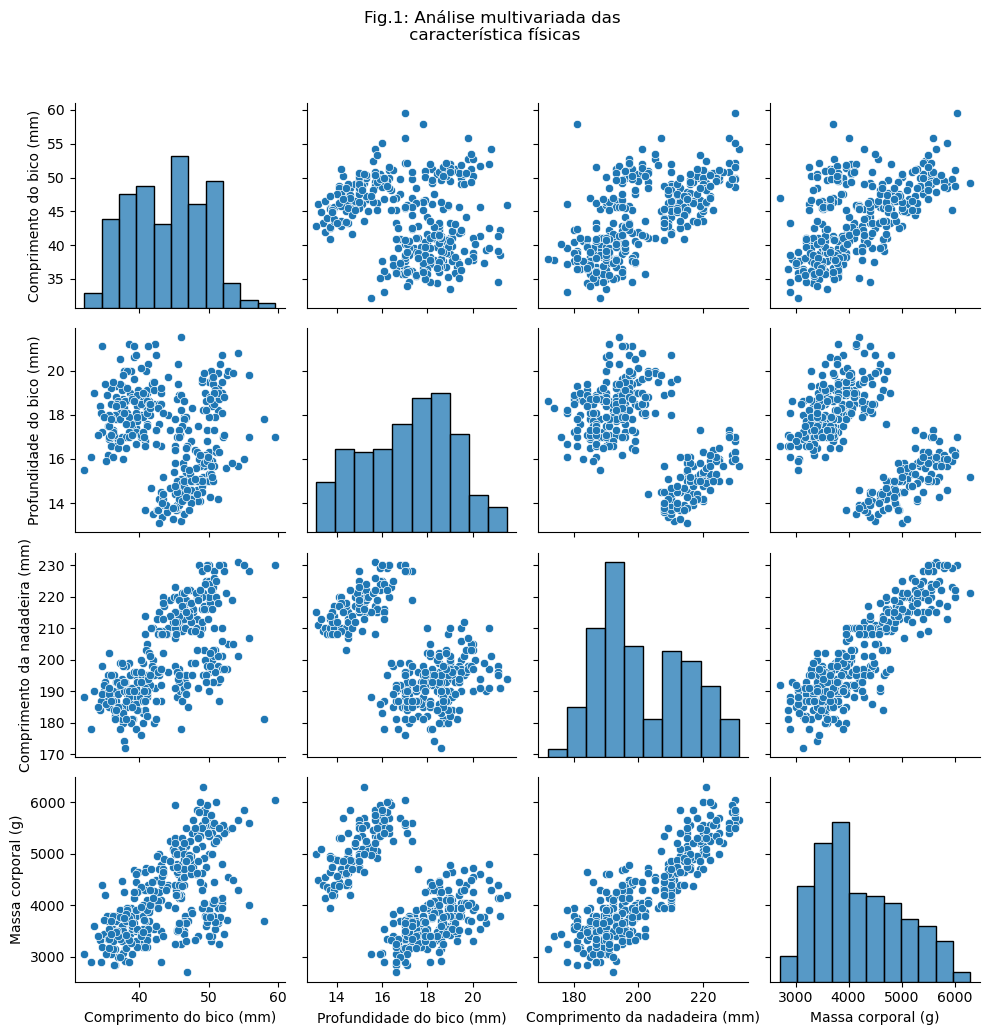

In [59]:
newlabels = {
    "bill_length_mm": "Comprimento do bico (mm)",
    "bill_depth_mm": "Profundidade do bico (mm)",
    "flipper_length_mm": "Comprimento da nadadeira (mm)",
    "body_mass_g": "Massa corporal (g)"}
df_nl = df.rename(columns=newlabels)

sns.pairplot(df_nl);
plt.suptitle("Fig.1: Análise multivariada das \n característica físicas ", y=1.03); 
plt.tight_layout();
plt.show();

### 3 - Pré-Modelagem
Nesta etapa foi realizada a normalização dos dados através da técnica **StandardScaler**(scikit-learn), que padroniza as variáveis para ter média = 0 e desvio padrão = 1

In [60]:

# Inicializar o StandardScaler
scaler = StandardScaler()
# Ajustar e transformar os dados selecionados
df_std= scaler.fit_transform(df[coll_n])

# dados normalizados
stats = [
    ("Média:", np.mean(df_std, axis=0)),
    ("Desvio padrão:", np.std(df_std, axis=0)),
    ("Mínimo:", np.min(df_std, axis=0)),
    ("Máximo:", np.max(df_std, axis=0)),
    ("Mediana:", np.median(df_std, axis=0))
]
# Formatação com alinhamento
for stat_name, values in stats:
    print(f"{stat_name:<15} {values[0]:>8.4f} {values[1]:>8.4f} {values[2]:>8.4f} {values[3]:>8.4f}")

Média:            0.0000   0.0000   0.0000  -0.0000
Desvio padrão:    1.0000   1.0000   1.0000   1.0000
Mínimo:          -2.1780  -2.0673  -2.0699  -1.8744
Máximo:           2.8582   2.2047   2.1460   2.6031
Mediana:          0.0929   0.0687  -0.2835  -0.1953


### 4- Modelagem K-means
O modelo K-means foi configurado com três parâmetros: 
* **n_clusters = 3** : Foi escolhido para refletir as três espécies de pinguins (Adélie, Gentoo e Chinstrap), garantindo que a estrutura natural dos dados fosse respeitada. 
* **n_init = 20**: assegura que o algoritmo execute múltiplas inicializações aleatórias dos centróides, selecionando a melhor solução em termos de minimização da variância intra-cluster, o que evita resultados subótimos devido a centróides mal posicionados na primeira tentativa. 
* **random_state = 42**:, é a semente pseudo-aleatória, para garantir a reprodutividade dos resultados. 



In [62]:
4- mod
kmeans_penguin = KMeans (n_clusters=3, n_init=50, random_state=42)
kmeans_penguin.fit(df_std)

centroides = kmeans_penguin.cluster_centers_
print('centroides normalizados')
display(centroides)

centroides_padronizados = kmeans_penguin.cluster_centers_  # Centroides padronizados retornados pelo k-means

# Inverter a padronização para obter os centroides originais
centroides_originais = scaler.inverse_transform(centroides_padronizados)
print('centroides valores originais')
display(centroides_originais)

labels = kmeans_penguin.labels_
print('labels')
display(labels)

centroides normalizados


array([[-1.04680889,  0.48662566, -0.88169491, -0.7627539 ],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078],
       [ 0.67202511,  0.80526339, -0.28934658, -0.38410387]])

centroides valores originais


array([[  38.27674419,   18.12170543,  188.62790698, 3593.79844961],
       [  47.56806723,   14.99663866,  217.23529412, 5092.43697479],
       [  47.66235294,   18.74823529,  196.91764706, 3898.23529412]])

labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [63]:
df_clusters = pd.DataFrame({
    'bill_length': df['bill_length_mm'],
    'bill_depth': df['bill_depth_mm'],
    'flipper_length': df['flipper_length_mm'],
    'body_mass': df['body_mass_g'],
    'cluster': labels.astype(str)
})

# Plotar os pontos de dados coloridos
A='bill_length'
B='bill_depth'
fig = px.scatter(df_clusters, x=A, y=B, color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Perfil de Viajantes')

# Adicionar os centroides ao gráfico
fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='black', symbol='star', size=14),
                name='Centroides')


fig.update_layout(xaxis_title=A, yaxis_title=B,
                  legend_title='Cluster')
fig.show()

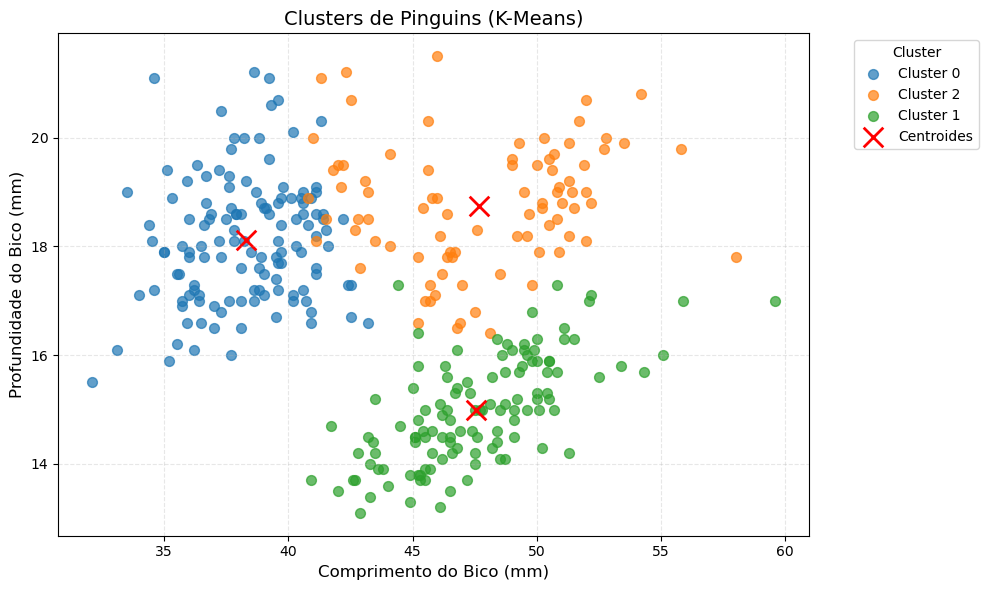

In [64]:
df_clusters = pd.DataFrame({
    'bill_length': df['bill_length_mm'],
    'bill_depth': df['bill_depth_mm'],
    'flipper_length': df['flipper_length_mm'],
    'body_mass': df['body_mass_g'],
    'cluster': labels.astype(str)  # Convertendo clusters para string (para cores categóricas)
})

# Variáveis para os eixos
A = 'bill_length'
B = 'bill_depth'

# Criar figura
plt.figure(figsize=(10, 6))

# Plotar pontos coloridos por cluster
for cluster in df_clusters['cluster'].unique():
    cluster_data = df_clusters[df_clusters['cluster'] == cluster]
    plt.scatter(
        cluster_data[A], 
        cluster_data[B], 
        label=f'Cluster {cluster}', 
        alpha=0.7,
        s=50  # Tamanho dos pontos
    )

# Plotar centroides (vermelho 'X')
plt.scatter(
    centroides_originais[:, 0], 
    centroides_originais[:, 1], 
    marker='x', 
    color='red', 
    s=200,  # Tamanho aumentado
    linewidths=2,  # Espessura do 'X'
    label='Centroides'
)

# Ajustes estéticos
plt.title('Clusters de Pinguins (K-Means)', fontsize=14)
plt.xlabel('Comprimento do Bico (mm)', fontsize=12)
plt.ylabel('Profundidade do Bico (mm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 2
 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


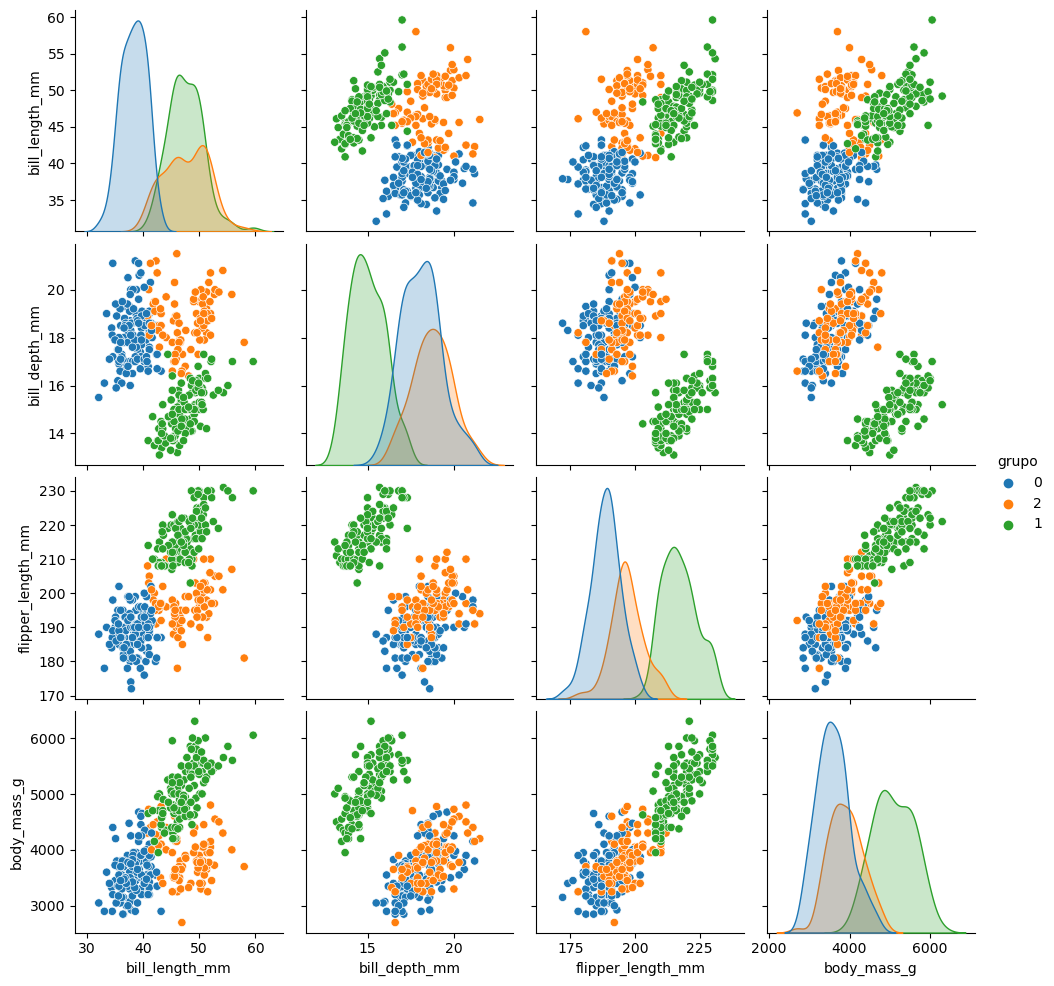

In [80]:
df['grupo']=kmeans_penguin.labels_.astype('str')



# grupo_mapeado = {0: 'Adelie', 1: 'Gentoo', 2: 'Chinstrap '}
# df['grupo'] = kmeans_penguin.labels_
# df['grupo'] = df['grupo'].map(grupo_mapeado)

sns.pairplot(df,hue='grupo')


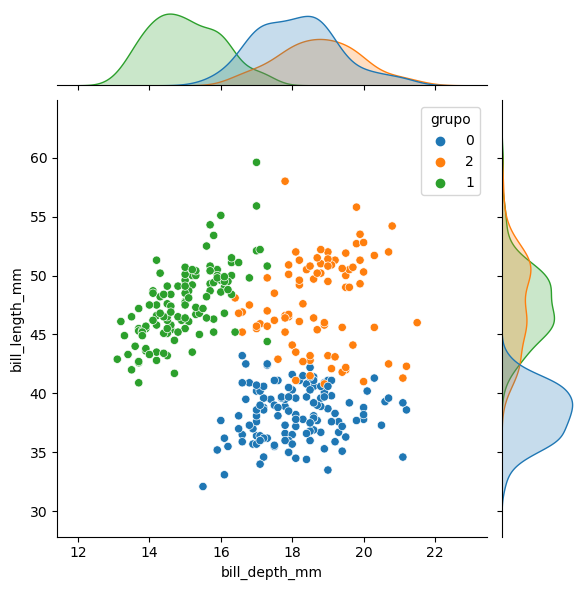

In [82]:
#sns.jointplot(df, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")

sns.jointplot(df, x="bill_depth_mm", y="bill_length_mm", hue="grupo");


## 6-Outras aplicações

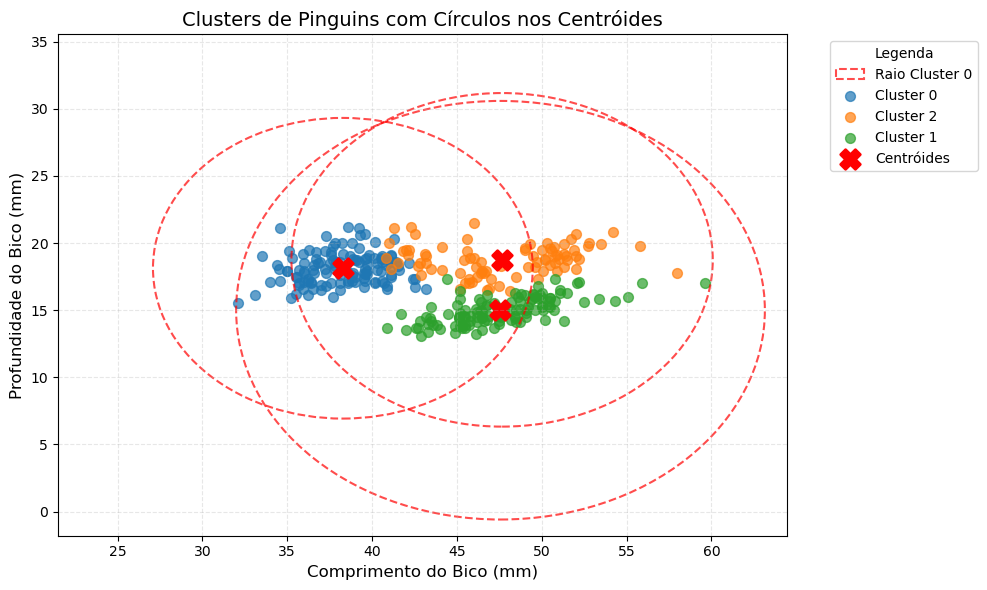